Import Dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/delhiaqi (1).csv')

View First few Rows

In [ ]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  
0   5.83  
1   7.66  
2  11.40  
3  13.55  
4  14.19  


Find the missing values

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


Find the duplicate values

In [ ]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


Information about the dataset

In [ ]:
print("\nData Types of Each Column:")
df_info = df.info()


Data Types of Each Column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [ ]:
# Descriptive statistics
print("Descriptive statistics:")
print(df.describe())


Descriptive statistics:
                 co          no         no2          o3         so2  \
count    561.000000  561.000000  561.000000  561.000000  561.000000   
mean    3814.942210   51.181979   75.292496   30.141943   64.655936   
std     3227.744681   83.904476   42.473791   39.979405   61.073080   
min      654.220000    0.000000   13.370000    0.000000    5.250000   
25%     1708.980000    3.380000   44.550000    0.070000   28.130000   
50%     2590.180000   13.300000   63.750000   11.800000   47.210000   
75%     4432.680000   59.010000   97.330000   47.210000   77.250000   
max    16876.220000  425.580000  263.210000  164.510000  511.170000   

             pm2_5         pm10         nh3  
count   561.000000   561.000000  561.000000  
mean    358.256364   420.988414   26.425062  
std     227.359117   271.287026   36.563094  
min      60.100000    69.080000    0.630000  
25%     204.450000   240.900000    8.230000  
50%     301.170000   340.900000   14.820000  
75%     416.65

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/delhiaqi (1).csv')  # Change to your actual file path if needed

# Parse date
df['date'] = pd.to_datetime(df['date'])

# Extract temporal features
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.date

# Define season mapper
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5, 6]:
        return 'Summer'
    elif month in [7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Post-Monsoon'

df['season'] = df['month'].apply(get_season)

# Aggregate to daily averages
daily_df = df.groupby('day')[['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].mean().reset_index()
daily_df = daily_df.merge(df[['day', 'season']].drop_duplicates(), on='day')


Correlation of Pollutants with PM2.5 (AQI Proxy)

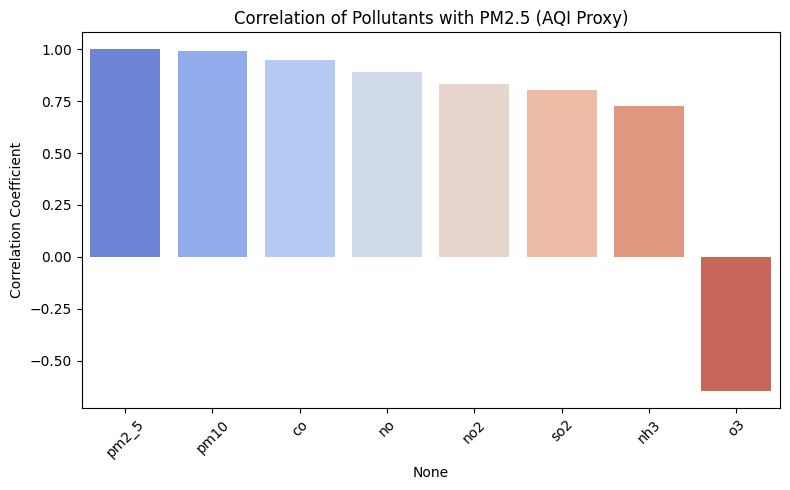

In [ ]:

numerical_cols = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
corr = daily_df[numerical_cols].corr()  # Calculate correlation only on these columns
pm25_corr = corr['pm2_5'].sort_values(ascending=False)



# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=pm25_corr.index, y=pm25_corr.values, hue=pm25_corr.index, palette="coolwarm", legend=False)

plt.title("Correlation of Pollutants with PM2.5 (AQI Proxy)")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Daily PM2.5 Levels Over Time**

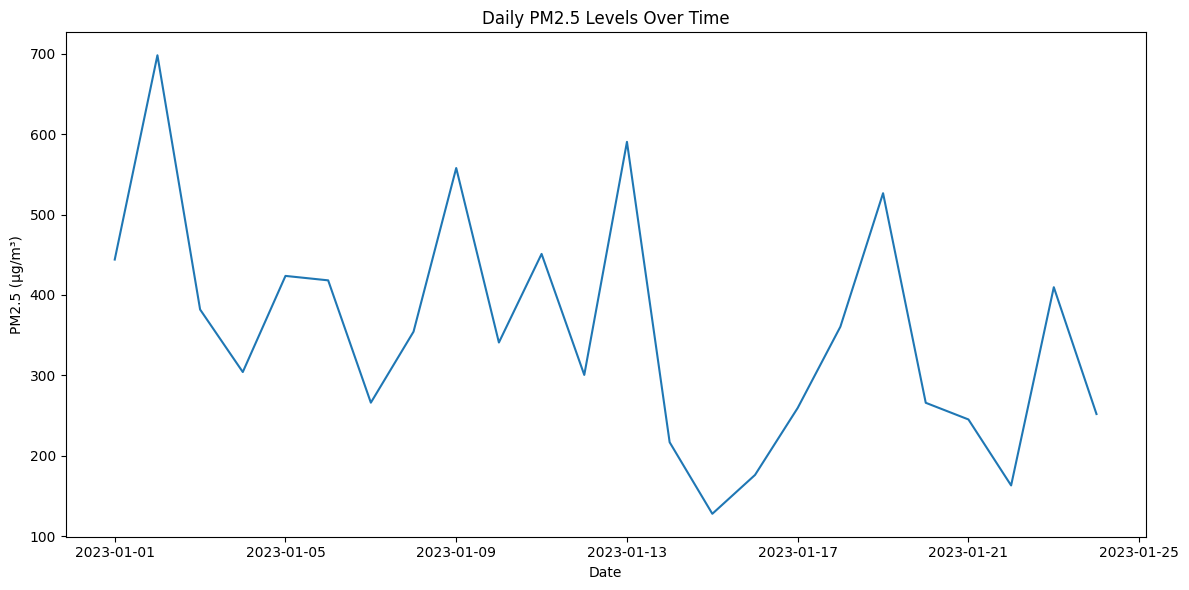

In [ ]:

daily_df['day'] = pd.to_datetime(daily_df['day'])

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_df, x='day', y='pm2_5')
plt.title('Daily PM2.5 Levels Over Time')
plt.ylabel('PM2.5 (µg/m³)')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

**Seasonal Variation in PM2.5 Levels**

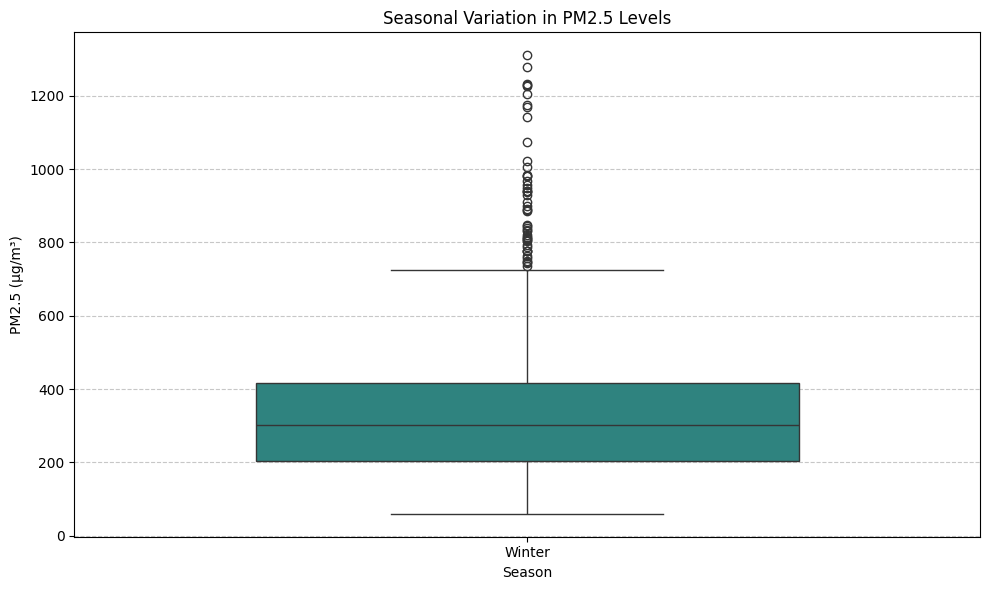

In [ ]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['date'])

# Extract month and assign season
df['month'] = df['date'].dt.month
df['season'] = df['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else
              'Summer' if x in [3, 4, 5] else
              'Monsoon' if x in [6, 7, 8, 9] else
              'Post-Monsoon'
)
# Filter relevant seasons (if needed)
season_filter = ['Winter', 'Summer', 'Monsoon']
filtered_df = df[df['season'].isin(season_filter)]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='pm2_5', hue='season', data=filtered_df, palette='viridis', width=0.6, legend=False)


plt.title('Seasonal Variation in PM2.5 Levels')
plt.ylabel('PM2.5 (µg/m³)')
plt.xlabel('Season')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()